# First Neuronal Network

## By Jairo Cortes

### course: https://platzi.com/new-home/clases/2263-redes-neuronales/37435-tu-primera-red-neuronal-con-keras/

### Import libraries using mnist

In [2]:
import numpy as np
from keras import layers, models
from keras.utils import to_categorical
from keras.datasets import mnist
import matplotlib.pyplot as plt

### Load data from mnist

The train and test data are saved in the variables train_data, test_data, train_labels and test_labes.

In [2]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

We have 60k examples, those examples are 28x28 images.

In [3]:
train_data.shape

(60000, 28, 28)

In [4]:
test_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

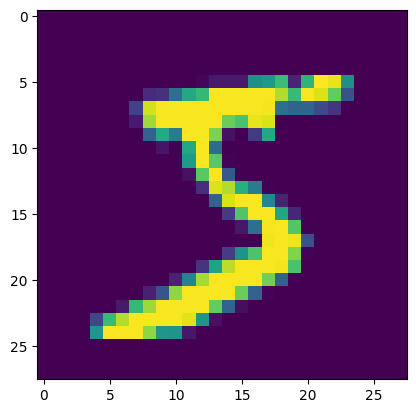

In [5]:
plt.imshow(train_data[0])

And each training data has its own label that correspond of the value of the image

In [6]:
train_labels[0]

5

### Load the model

We are setting the model with 512 hidden layer with relu activation, and we will have 10 outputs (0,1,2,...,9) with softmax activation.

In [7]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu',input_shape=(28*28,)))
model.add(layers.Dense(10,activation='softmax'))

c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


For this model we are going to use rmsprop optimizer, with a categorical crssentropy loss funciton and we will check the accuracy.

In [8]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

Let's reshape the input for a better performance. Instead of 3 dimension vector, we are going to work with 2 dimension vector. Also, if better to work with point float numbers instead of integers and make a normalization (divide by 255, the higher value of the pixels).

In [10]:
x_train = train_data.reshape(60000,28*28)
x_train = x_train.astype("float32")/255

x_tetst = test_data.reshape(10000,28*28)
x_test = x_tetst.astype("float32")/255

In [11]:
x_train[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

Now we are predicting integer that can be categories, 1 or 2 or etc. So optimize the prediction with categorical output.

In [12]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

### Training the model

In [13]:
model.fit(x_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8712 - loss: 0.4418
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9654 - loss: 0.1167
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9784 - loss: 0.0715
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9851 - loss: 0.0512
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9894 - loss: 0.0365


In [14]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - accuracy: 0.9771 - loss: 0.0772


[0.06592132896184921, 0.9800000190734863]

### Make prediction

### Example with sklearn

In [3]:
from sklearn.datasets import make_gaussian_quantiles

In [4]:
N = 1000
gassuan = make_gaussian_quantiles(mean=None, cov=0.1, n_samples=N, n_features=2, n_classes=2, shuffle=True, random_state=None)
X, Y = gassuan

In [5]:
X.shape

(1000, 2)

In [6]:
Y = Y[:,np.newaxis]

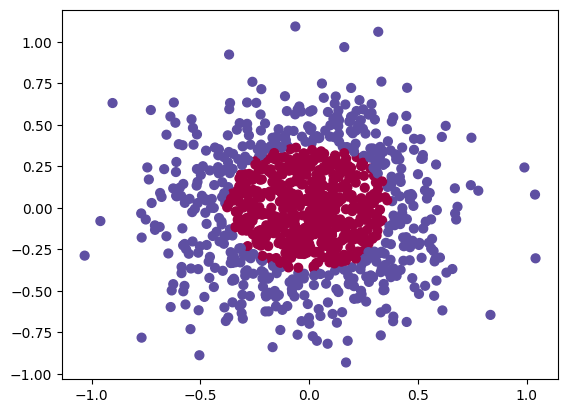

In [7]:
plt.scatter(X[:,0], X[:,1], c=Y[:,0], s=40, cmap=plt.cm.Spectral)

In [83]:
def sigmoid(x, derivate=False):
    if derivate:
        return x * (1-x)
    else:
        return 1/(1+np.exp(-x))
    
def relu(x, derivate=False):
    if derivate:
        return x > 0
    return np.maximum(0,x)

In [78]:
def mse(y: np.ndarray, y_hat:np.ndarray, derivate:bool = False) -> np.ndarray:
    if derivate:
        return y_hat - y
    else:
        return np.mean((y_hat - y)**2)

In [101]:
def initialize_parameters(layer_dims):
    np.random.seed(1)
    parameters = {}
    L = len(layer_dims)         
    for l in range(0, L-1):
        parameters['W' + str(l+1)] = (np.random.rand(layer_dims[l], layer_dims[l+1]) * 2) - 1
        parameters['b' + str(l+1)] = (np.random.rand(1, layer_dims[l+1]) * 2) - 1
    return parameters

In [137]:
example = [2,4,8,1]
params = initialize_parameters(example)
print('W1= ' + str(params['W1']) + "\n" + 'b1= ' + str(params['b1']) + "\n" +'W2= ' + str(params['W2']) + "\n" + 'b2= ' + str(params['b2']) + "\n" + 'W3= ' + str(params['W3']) + "\n" + 'b3= ' + str(params['b3']))

W1= [[ 0.37315512  0.83309299 -0.74145271  0.10679635]
 [-0.61355272 -0.30484877  0.88831338  0.12323496]]
b1= [[ 0.78992362 -0.29829652 -0.77713355 -0.90370319]]
W2= [[-0.42938903 -0.12581504 -0.55609408  0.12485965 -0.50289032  0.20079377
  -0.19784825  0.15178732]
 [-0.70839858  0.61118102 -0.16188326  0.37197081  0.52242746  0.31892649
   0.31180214  0.7132666 ]
 [-0.75333407 -0.91882628 -0.95924566  0.06796677 -0.04753944  0.52668349
  -0.96704744 -0.15726296]
 [-0.24807    -0.80606329  0.32396186 -0.43696583 -0.91519066 -0.85808992
  -0.48561733  0.34759985]]
b2= [[-0.55640383 -0.12012742 -0.17234768  0.45848661  0.29995373 -0.71442214
   0.04268511  0.48992698]]
W3= [[-0.35543793]
 [ 0.54018361]
 [ 0.08966117]
 [-0.21383017]
 [-0.4321056 ]
 [ 0.14829962]
 [-0.12252165]
 [-0.48362662]]
b3= [[0.83514799]]


### Forward

In [115]:
params['A0'] = X
params['Z1'] = np.matmul(params['A0'],params['W1'])+params['b1']
params['A1'] = relu(params['Z1'])

params['Z2'] = np.matmul(params['A1'],params['W2'])+params['b2']
params['A2'] = relu(params['Z2'])

params['Z3'] = np.matmul(params['A2'],params['W3'])+params['b3']
params['A3'] = sigmoid(params['Z3'])

params['A3'].shape

(1000, 1)

In [25]:
print(np.mean(params['A3']))

0.6678415590836086


### Backpropagation

In [27]:
params['dZ3'] = mse(Y, params['A3'], True) * sigmoid(params['A3'], True)
params['dW3'] = np.matmul(params['A2'].T,params['dZ3'])

params['dZ2'] = np.matmul(params['dZ3'],params['W3'].T) * relu(params['A2'],True)
params['dW2'] = np.matmul(params['A1'].T,params['dZ2'])

params['dZ1'] = params['dZ2']@params['W2'].T * relu(params['A1'], True)
params['dW1'] = np.matmul(X.T,params['dZ1'])

### Gradient Decent

In [28]:
params['dW2'].shape

(4, 8)

In [29]:
params['W3'] = params['W3'] - params['dW3'] * 0.0001
params['b3'] = params['b3'] - (np.mean(params['dW3'], axis=0, keepdims=True)) * 0.0001

params['W2'] = params['W2'] - params['dW2'] * 0.0001
params['b2'] = params['b2'] - (np.mean(params['dW2'], axis=0, keepdims=True)) * 0.0001

params['W1'] = params['W1'] - params['dW1'] * 0.0001
params['b1'] = params['b1'] - (np.mean(params['dW1'], axis=0, keepdims=True)) * 0.0001

In [30]:
print('W1= ' + str(params['W1']) + "\n" + 'b1= ' + str(params['b1']) + "\n" +'W2= ' + str(params['W2']) + "\n" + 'b2= ' + str(params['b2']) + "\n" + 'W3= ' + str(params['W3']) + "\n" + 'b3= ' + str(params['b3']))

W1= [[ 0.00085198  0.62302176  0.59176314 -0.6288913 ]
 [-0.12827175  0.47886889  0.83351091 -0.45162512]]
b1= [[ 0.73895    -0.47719037 -0.80191861  0.23030688]]
W2= [[-0.16645524  0.85020712  0.04826684 -0.15165475  0.12136112  0.52900608
  -0.73873086  0.09579207]
 [ 0.2073367   0.85658064  0.15633988 -0.61736829 -0.68199466  0.91013869
  -0.14911015  0.96773828]
 [ 0.67691818 -0.47170515  0.33641708 -0.59438686  0.52472264  0.9215689
  -0.43442483 -0.78713475]
 [-0.97344624  0.06175623 -0.75087873  0.13646468  0.47309512  0.31131564
   0.69306724 -0.04344577]]
b2= [[-0.77213465 -0.57029869  0.74894808  0.966849   -0.48739081  0.5206609
   0.67654252  0.06984175]]
W3= [[-0.87411005]
 [ 0.08586429]
 [ 0.85792088]
 [ 0.38292226]
 [-0.45425649]
 [ 0.44668062]
 [ 0.13000644]
 [-0.81906813]]
b3= [[-0.55390252]]


#### Function


In [81]:
def train(X: np.ndarray, learning_rate: float, params ,training  = True):
    params['A0'] = X
    params['Z1'] = np.matmul(params['A0'],params['W1'])+params['b1']
    params['A1'] = relu(params['Z1'])

    params['Z2'] = np.matmul(params['A1'],params['W2'])+params['b2']
    params['A2'] = relu(params['Z2'])

    params['Z3'] = np.matmul(params['A2'],params['W3'])+params['b3']
    params['A3'] = sigmoid(params['Z3'])
    
    if training:
        #Backpropagation
        params['dZ3'] = mse(Y, params['A3'], True) * sigmoid(params['A3'], True)
        params['dW3'] = np.matmul(params['A2'].T,params['dZ3'])

        params['dZ2'] = np.matmul(params['dZ3'],params['W3'].T) * relu(params['A2'],True)
        params['dW2'] = np.matmul(params['A1'].T,params['dZ2'])

        params['dZ1'] = params['dZ2']@params['W2'].T * relu(params['A1'], True)
        params['dW1'] = np.matmul(X.T,params['dZ1'])
        
        #Gradient Decent
        params['W3'] = params['W3'] - params['dW3'] * learning_rate
        params['b3'] = params['b3'] - (np.mean(params['dZ3'], axis=0, keepdims=True)) * learning_rate

        params['W2'] = params['W2'] - params['dW2'] * learning_rate
        params['b2'] = params['b2'] - (np.mean(params['dZ2'], axis=0, keepdims=True)) * learning_rate

        params['W1'] = params['W1'] - params['dW1'] * learning_rate
        params['b1'] = params['b1'] - (np.mean(params['dZ1'], axis=0, keepdims=True)) * learning_rate
        
    return params['A3']

In [102]:
layers_dims = [2,4,8,1]
params = initialize_parameters(layers_dims)
errors = []
for _ in range(60000):
    output = train(X,0.00001,params)
    error = mse(Y,output)
    errors.append(error)
print(errors[-1])

0.05295678413617039


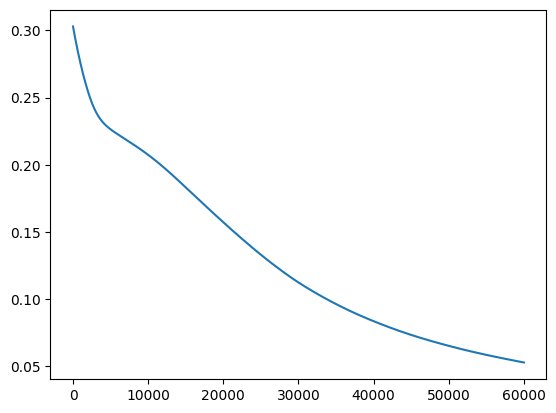

In [103]:
plt.plot(errors)

In [104]:
data_test = (np.random.rand(1000,2)*2)-1
y = train(data_test, 0.00001, params, training = False)

In [105]:
y = np.where(y >= 0.5, 1, 0)

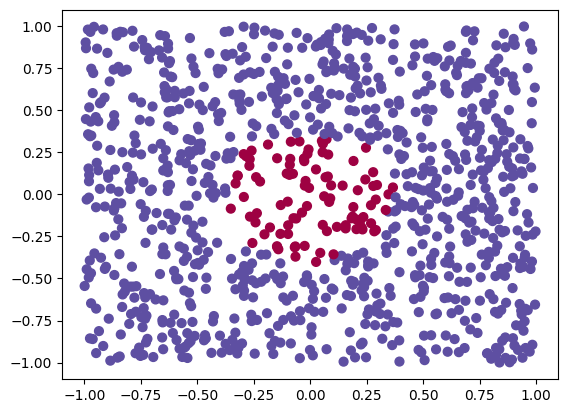

In [106]:
plt.scatter(data_test[:,0], data_test[:,1], c=y[:,0], s=40, cmap=plt.cm.Spectral)